In [ ]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data=pd.read_excel("classification_df.xlsx")
raw_data

,emission_factor,biofuel,coal,gas,hydro,nuclear,oil,solar,wind
0,0,0.001917,0.027249,0.007600,0.002894,0.001846,0.003933,0.000008,0.000066
1,0,0.001926,0.027237,0.008152,0.003029,0.001484,0.003880,0.000008,0.000158
2,0,0.002307,0.027553,0.009131,0.003113,0.001619,0.003723,0.000008,0.000162
3,0,0.002207,0.028429,0.009523,0.002943,0.001667,0.003778,0.000007,0.000190
4,0,0.002263,0.028995,0.010565,0.003029,0.001717,0.003472,0.000015,0.000266
...,...,...,...,...,...,...,...,...,...
1076,0,0.054464,0.137422,0.054653,0.017221,0.040206,0.007891,0.050446,0.052227
1077,0,0.057102,0.133181,0.055588,0.017235,0.041214,0.007336,0.061238,0.057873
1078,0,0.059803,0.126715,0.054726,0.017545,0.039248,0.006727,0.073353,0.064210
1079,0,0.064092,0.135483,0.055630,0.017121,0.040581,0.007167,0.089958,0.074012


In [3]:
X = raw_data.drop("emission_factor", axis=1)
y = raw_data[["emission_factor"]]
X.shape

(1081, 8)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0, stratify=y)

In [39]:
names = [
    "KNeighborsClassifier",
    'SVC',
    'GaussianProcessClassifier',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'MLPClassifier',
    'AdaBoostClassifier',
    'GaussianNB',
    'LogisticRegression',
]

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

In [ ]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('Accuracy: ', "{:.2f}".format(score), ' <---- ', name)

Accuracy:  0.91  <----  KNeighborsClassifier
Accuracy:  0.84  <----  SVC
Accuracy:  0.80  <----  GaussianProcessClassifier
Accuracy:  0.88  <----  DecisionTreeClassifier
Accuracy:  0.96  <----  RandomForestClassifier
Accuracy:  0.82  <----  MLPClassifier
Accuracy:  0.90  <----  AdaBoostClassifier
Accuracy:  0.78  <----  GaussianNB
Accuracy:  0.79  <----  LogisticRegression


METRICHE

In [14]:
from sklearn.metrics import classification_report
clf = GaussianNB() # Euclidean Distance Metric
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.58      0.72       109
           1       0.70      0.98      0.82       108

    accuracy                           0.78       217
   macro avg       0.83      0.78      0.77       217
weighted avg       0.83      0.78      0.77       217

Train Accuracy:  0.7268518518518519
Test Accuracy:  0.7788018433179723


ANDAMENTO FOLD

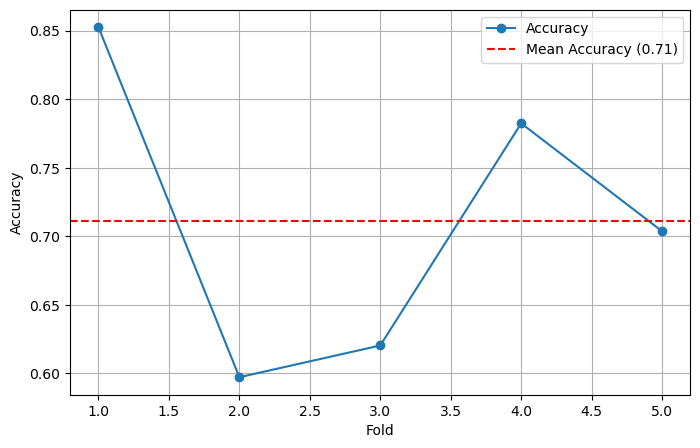

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

# Calcolare la mean accuracy con cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # CV = 5-fold cross-validation

# Visualizzare il grafico
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', label="Accuracy")
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f"Mean Accuracy ({np.mean(cv_scores):.2f})")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

MATRICI DI CONFUSIONE

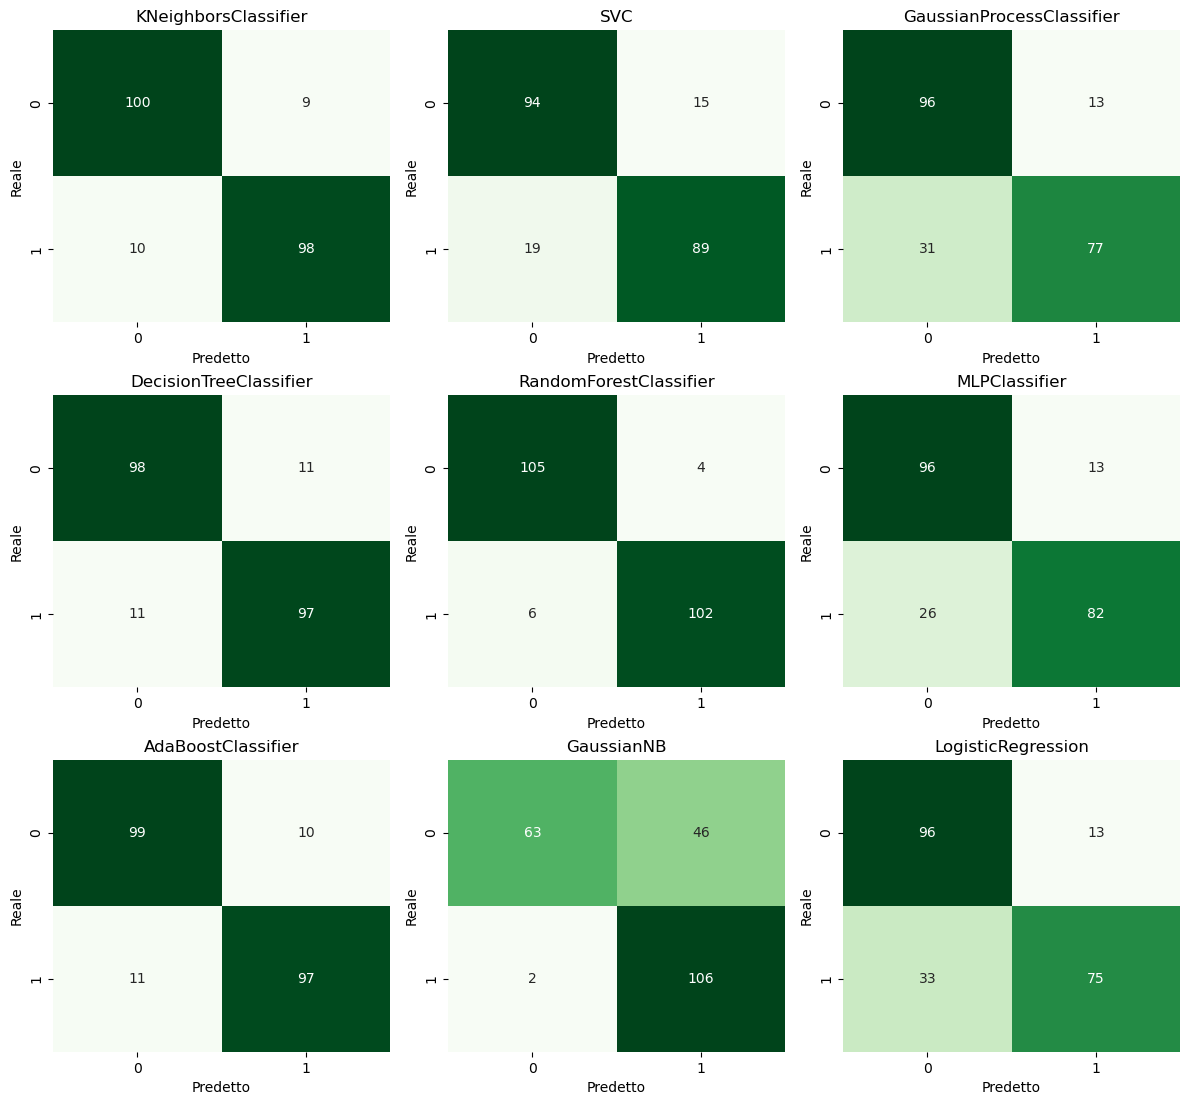

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iteriamo sui classificatori e sugli assi dei subplot
for ax, name, clf in zip(axes.ravel(), names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot della matrice di confusione
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predetto")
    ax.set_ylabel("Reale")

# Miglioriamo il layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Per lasciare spazio al titolo
plt.show()

MATRICE DI CONFUSIONE CON K-FOLD CROSS VALIDATION

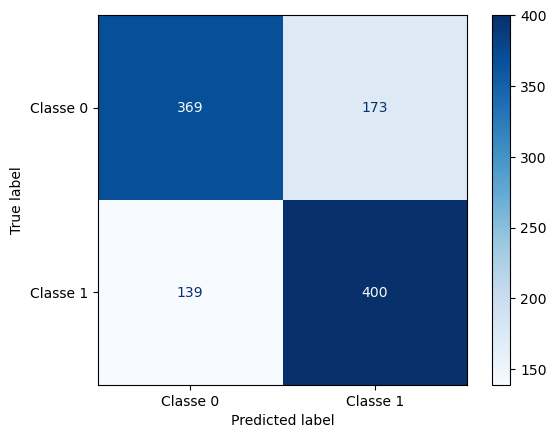

In [27]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)

y_pred = cross_val_predict(model, X, y, cv=5)

# Calcola la matrice di confusione
cm = confusion_matrix(y, y_pred)

class_labels = ["Classe 0", "Classe 1"]  # Cambia con le tue classi

# Visualizza la matrice di confusione
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues")
plt.show()

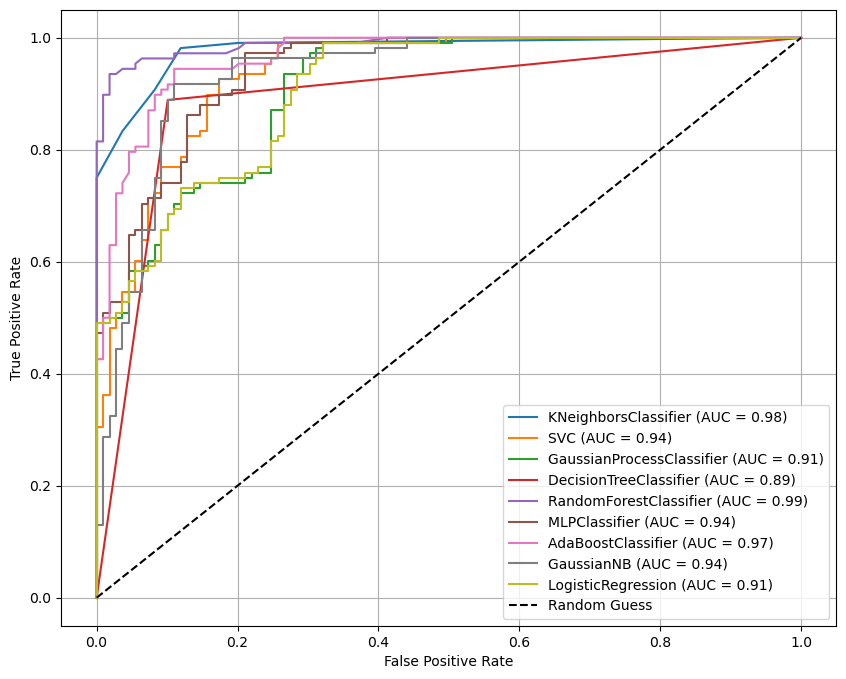

In [16]:
from sklearn.metrics import roc_curve, auc

# Creiamo la figura
plt.figure(figsize=(10, 8))

# Iteriamo sui classificatori
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]  # Probabilità della classe positiva

    # Calcoliamo ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plottiamo la curva ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Aggiungiamo dettagli al grafico
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")  # Linea di riferimento casuale
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

[{'Modello': 'KNeighborsClassifier', 'Mean Accuracy': 0.7381080389144905, 'Std Dev': 0.07437155736796211}, {'Modello': 'SVC', 'Mean Accuracy': 0.720558115719406, 'Std Dev': 0.09038771990584622}, {'Modello': 'GaussianProcessClassifier', 'Mean Accuracy': 0.7769713261648745, 'Std Dev': 0.08803667045132936}, {'Modello': 'DecisionTreeClassifier', 'Mean Accuracy': 0.6817246970472777, 'Std Dev': 0.06832600193863866}, {'Modello': 'RandomForestClassifier', 'Mean Accuracy': 0.7084613415258577, 'Std Dev': 0.10420554241968301}, {'Modello': 'MLPClassifier', 'Mean Accuracy': 0.7751066734937703, 'Std Dev': 0.07929106552371332}, {'Modello': 'AdaBoostClassifier', 'Mean Accuracy': 0.7408687489332652, 'Std Dev': 0.07805298066705851}, {'Modello': 'GaussianNB', 'Mean Accuracy': 0.7122503840245776, 'Std Dev': 0.06416555075522133}, {'Modello': 'LogisticRegression', 'Mean Accuracy': 0.7853046594982078, 'Std Dev': 0.08808377927546711}]


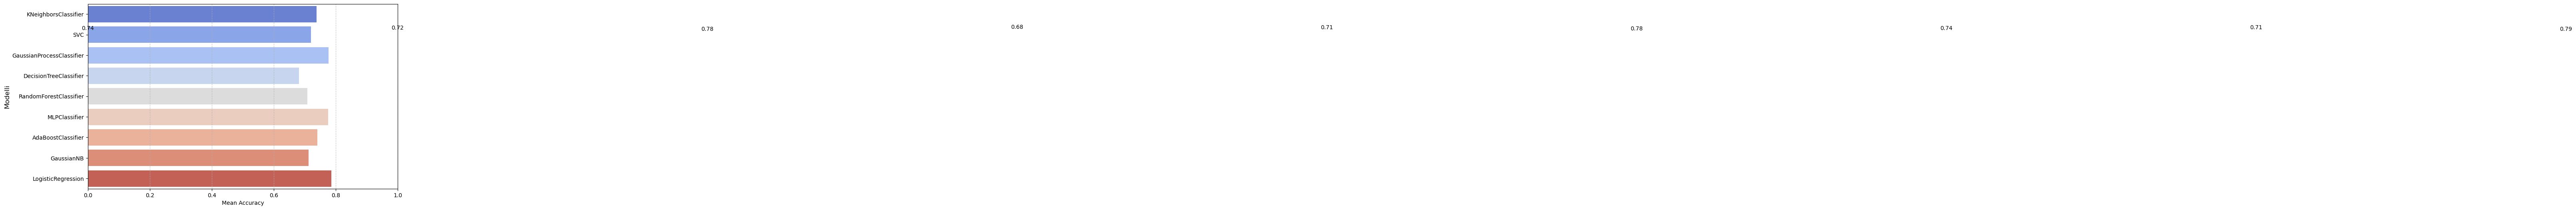

In [40]:
mean_accuracies = {}

# Lista per salvare i risultati
results = []
accuracies = []

for name, model in zip(names, classifiers):
    cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    #model.fit(X_train, y_train)
    #cv_scores = model.score(X_test, y_test)
    results.append({
        "Modello": name,
        "Mean Accuracy": np.mean(cv_scores),
        "Std Dev": np.std(cv_scores)  # Deviazione standard
    })

    accuracies.append(cv_scores)
    
print(results)

# Creazione del DataFrame con i risultati
df_results = pd.DataFrame(results)

# Visualizzazione del barplot con sns
plt.figure(figsize=(10, 6))
sns.barplot(
    y="Modello", x="Mean Accuracy", data=df_results,
    palette="coolwarm", ci=None,  # Barre di errore
)

plt.ylabel("Modelli", fontsize=12)
plt.xlim(0, 1)  # Accuratezza tra 0 e 1
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Annotazioni sopra le barre (mostra il valore di accuratezza)
for i, row in df_results.iterrows():
    plt.text(i, row["Mean Accuracy"] + 0.02, f"{row['Mean Accuracy']:.2f}", ha="center", fontsize=10)

plt.show()

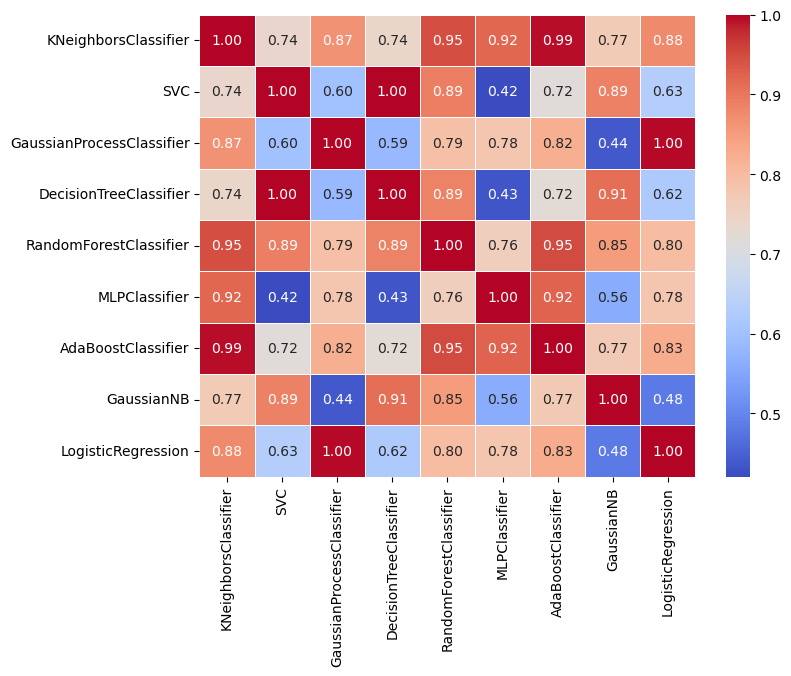

In [43]:
# Calcolare la matrice di correlazione tra i modelli (accuratezze per ciascun fold)
accuracies = np.array(accuracies).T  # Trasposta per avere le accuratezze di ogni modello come colonne
correlation_matrix = np.corrcoef(accuracies, rowvar=False)  # Calcola la matrice di correlazione

# Converti la matrice di correlazione in un DataFrame per una migliore visualizzazione
correlation_df = pd.DataFrame(correlation_matrix, index=names, columns=names)

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
# Definizione dei classificatori
from sklearn.model_selection import GridSearchCV, KFold

classifiers = {
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "MLPClassifier": MLPClassifier(),
    "LogisticRegression": LogisticRegression()
}

# Definizione della cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Confronto senza Grid Search
print("Cross-Validation senza Grid Search:")
for name, model in classifiers.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy media = {scores.mean():.4f}")

# Grid Search per ottimizzare i modelli
param_grid = {
    "GaussianProcessClassifier": {
        'kernel': [None, 1.0 * RBF(1.0)],  
        'n_restarts_optimizer': [0, 1, 3],  
    },
    
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],   
        'activation': ['relu', 'tanh'],  
        'solver': ['adam', 'lbfgs'],  
        'alpha': [0.0001, 0.001, 0.01],  
        'learning_rate': ['constant', 'adaptive'],  
    },

    "LogisticRegression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],  
        'C': [0.01, 0.1, 1, 10, 100],  
        'solver': ['lbfgs', 'liblinear', 'saga'],  
        'max_iter': [100, 500, 1000],  
    }
}


# Confronto con Grid Search
print("\nCross-Validation con Grid Search:")
for name, model in classifiers.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_score = grid_search.best_score_
    print(f"{name}: Accuracy media dopo Grid Search = {best_score:.4f}")


Cross-Validation senza Grid Search:
GaussianProcessClassifier: Accuracy media = 0.7770
MLPClassifier: Accuracy media = 0.7779
LogisticRegression: Accuracy media = 0.7853

Cross-Validation con Grid Search:
GaussianProcessClassifier: Accuracy media dopo Grid Search = 0.7770
MLPClassifier: Accuracy media dopo Grid Search = 0.8278
LogisticRegression: Accuracy media dopo Grid Search = 0.7853


MODEL ENSEMBLE

In [62]:
best_model = VotingClassifier(estimators=[('svc', SVC(probability=True)), ('mlp', MLPClassifier())], voting='soft')
best_model.fit(X_train,y_train.values.ravel())
print(accuracy_score(y_test,best_model.predict(X_test)))

0.815668202764977


In [ ]:
best_model = VotingClassifier(estimators=[('svc', SVC(probability=True)), ('mlp', MLPClassifier())], voting='soft')
cv_scores_soft = cross_val_score(best_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Accuracy (Soft Voting) in Cross-Validation: {np.mean(cv_scores_soft):.4f} ± {np.std(cv_scores_soft):.4f}')

Accuracy (Soft Voting) in Cross-Validation: 0.7844 ± 0.0829


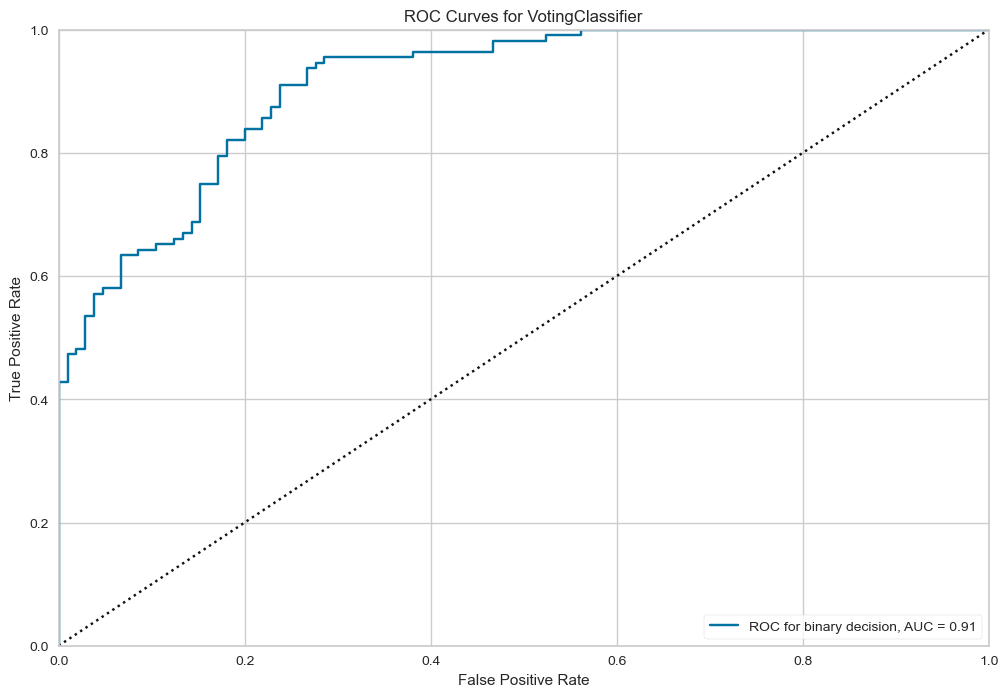

<Axes: title={'center': 'ROC Curves for VotingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
plt.figure(figsize=(12,8))
visualizer = ROCAUC(best_model, classes=[0, 1], micro=False, macro=False, binary=True)
visualizer.fit(X_train, y_train.values.ravel())        # Fit the training data to the visualizer
visualizer.score(X_test, y_test.values.ravel())        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

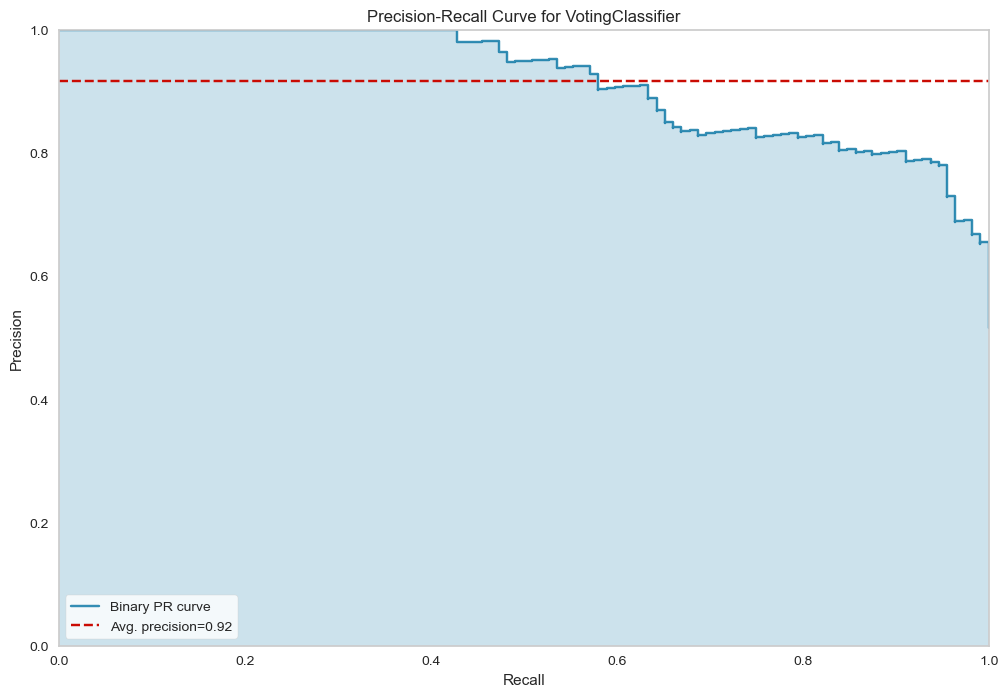

<Axes: title={'center': 'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [72]:
plt.figure(figsize=(12,8))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

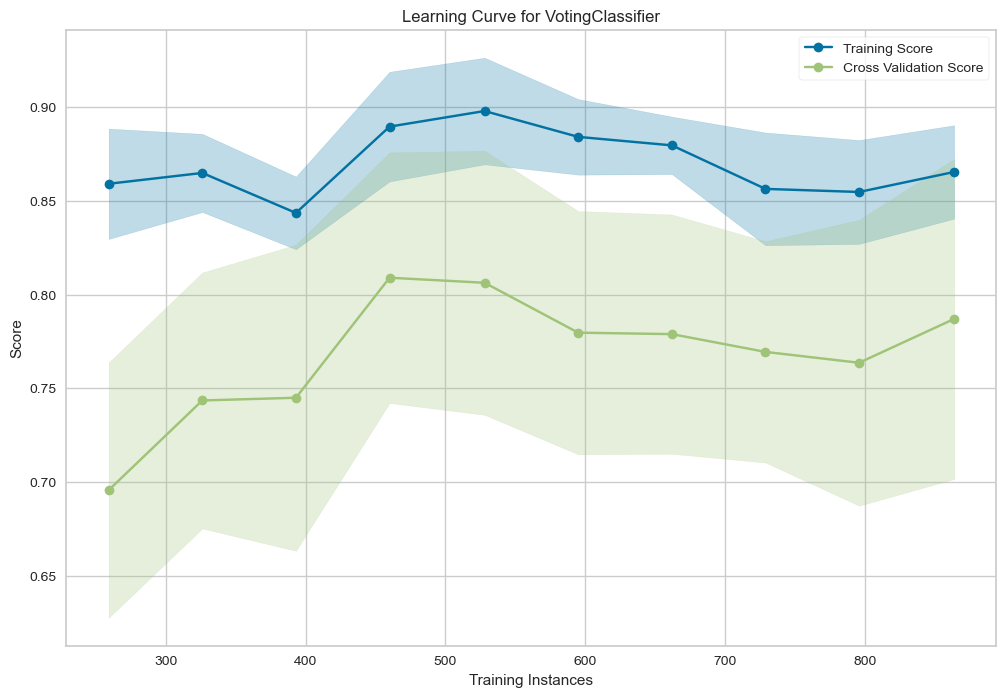

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [67]:
# Create the learning curve visualizer
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(12,8))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure